# EDA Case Study - Ravi Edla and Vaibhav Sharma

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import glob
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#Importing current data set
appl_curr_data=pd.read_csv(r'C:\Users\Ravi.Edla.BENTLEY\Downloads\AnacondaFiles\AssignmentWorks\03_EDA_CaseStudy\Dataset\application_data.csv')
appl_curr_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Routine check 
appl_curr_data.shape

(307511, 122)

In [4]:
## Data Info
appl_curr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
## Data Description
appl_curr_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
## Datatypes details
appl_curr_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
#find the missing value percentage
appl_curr_data.isna().mean().round(4) * 100

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [8]:
#Removing columns with high percentage of missing value
req_data = appl_curr_data.columns[appl_curr_data.isnull().mean()>0.4]
appl_curr_data2 = appl_curr_data.drop(req_data, axis=1)
appl_curr_data2.isna().mean().round(4) * 100

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [9]:
#selecting only column that we need to analyse
appl_curr_Data3 = appl_curr_data2[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH',
         'FLAG_MOBIL',  'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','OCCUPATION_TYPE']]
appl_curr_Data3.shape

(307511, 36)

Imputing values for columns where missing value percentage is less ~13%

In [10]:
appl_curr_Data3.isna().mean().round(4) * 100

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_LAST_PHONE_CHANGE          0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
E

For categorical columns:-we can impute the MODE
For continous value we can impute median 

In [11]:
ext_source_2_med = stat.median(appl_curr_Data3['EXT_SOURCE_2'])
ext_source_2_med

0.22495898293183347

In [12]:
amt_goods_price_med = stat.median(appl_curr_Data3['AMT_GOODS_PRICE'])
amt_goods_price_med

270000.0

Finding outliers in numeric data

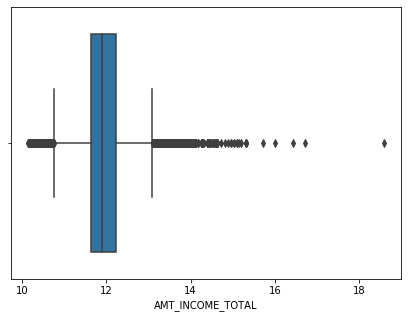

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(np.log(appl_curr_Data3['AMT_INCOME_TOTAL']))

In [14]:
appl_curr_Data3['AMT_INCOME_TOTAL'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
5%       6.750000e+04
10%      8.100000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
90%      2.700000e+05
95%      3.375000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Treating the Outliers

In [15]:
outlier_list = ['AMT_INCOME_TOTAL']
for col in outlier_list:
    percentiles = appl_curr_Data3[col].quantile([0.1,0.99]).values    
    appl_curr_Data3[col] = np.clip(appl_curr_Data3[col], percentiles[0], percentiles[1])
appl_curr_Data3['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean     167627.099283
std       81149.349470
min       81000.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

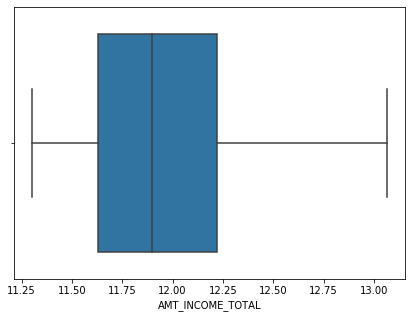

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(np.log(appl_curr_Data3['AMT_INCOME_TOTAL']))

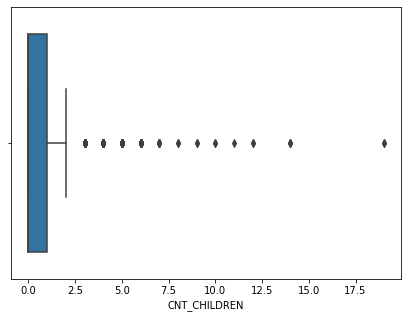

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot((appl_curr_Data3['CNT_CHILDREN']))

In [18]:
outlier_list = ['CNT_CHILDREN']
for col in outlier_list:
    percentiles = appl_curr_Data3[col].quantile([0.0,0.99]).values    
    appl_curr_Data3[col] = np.clip(appl_curr_Data3[col], percentiles[0], percentiles[1])
appl_curr_Data3['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.414401
std           0.707106
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: CNT_CHILDREN, dtype: float64

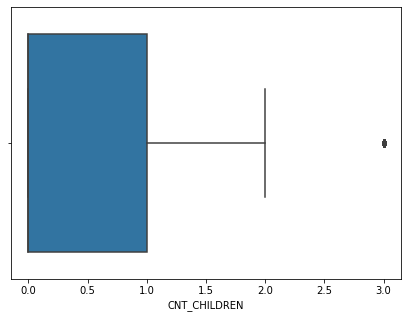

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot((appl_curr_Data3['CNT_CHILDREN']))

Binning
Binning can be done on the basis of Size of Family of the client. The income is divided into 3 categories. Small, Medium and Large family.

In [20]:
binn_labels = ['Small', 'Medium', 'Large']
cutoff_bins = [0, 4, 7, max(appl_curr_Data3.CNT_FAM_MEMBERS)]
appl_curr_Data3['family_size_bin'] = pd.cut(appl_curr_Data3['CNT_FAM_MEMBERS'], bins=cutoff_bins, labels=binn_labels)
appl_curr_Data3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-1134.0,-2120,1,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,1.0,0,0,Laborers,Small
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small
2,100004,0,Revolving loans,M,Y,Y,0,81000.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-815.0,-2531,1,1.0,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0,0,Laborers,Small
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-617.0,-2437,1,2.0,2,2,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Laborers,Small
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-1106.0,-3458,1,1.0,2,2,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small


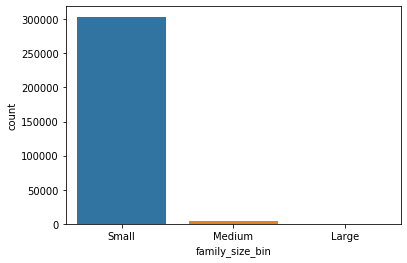

In [21]:
sns.countplot(x=appl_curr_Data3['family_size_bin'],data=appl_curr_Data3)

Analyses
Class Imbalance

In [22]:
total = appl_curr_Data3['TARGET'].count()
target1 = appl_curr_Data3['TARGET'].sum()
target0  = total- target1

In [23]:
#Loan defaulter
(target1/total)*100

8.072881945686495

In [24]:
#Loan non-defaulter
(target0/total)*100

91.92711805431351

In [25]:
defaulter=appl_curr_Data3[appl_curr_Data3.TARGET==1]
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-1134.0,-2120,1,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,1.0,0,0,Laborers,Small
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-161.0,-1827,1,1.0,3,2,Business Entity Type 3,0.548477,0.190706,0.0,0.0,0.0,2.0,2.0,0,0,Cooking staff,Small
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1075.0,-1029,1,2.0,2,2,Business Entity Type 3,0.306841,0.320163,0.0,0.0,2.0,0.0,4.0,0,0,Laborers,Small
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-1480.0,-4409,1,2.0,3,3,Self-employed,0.674203,0.399676,0.0,0.0,0.0,0.0,2.0,0,0,Sales staff,Small
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,0.0,-4199,1,2.0,2,2,XNA,0.023952,0.720944,0.0,0.0,0.0,0.0,0.0,0,0,NaN,Small


In [26]:
non_defaulter=appl_curr_Data3[appl_curr_Data3.TARGET==0]
non_defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small
2,100004,0,Revolving loans,M,Y,Y,0,81000.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-815.0,-2531,1,1.0,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0,0,Laborers,Small
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-617.0,-2437,1,2.0,2,2,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Laborers,Small
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-1106.0,-3458,1,1.0,2,2,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-2536.0,-477,1,2.0,2,2,Other,0.354225,0.621226,0.0,0.0,0.0,1.0,1.0,0,0,Laborers,Small


# Univariate analysis on Categorical variables

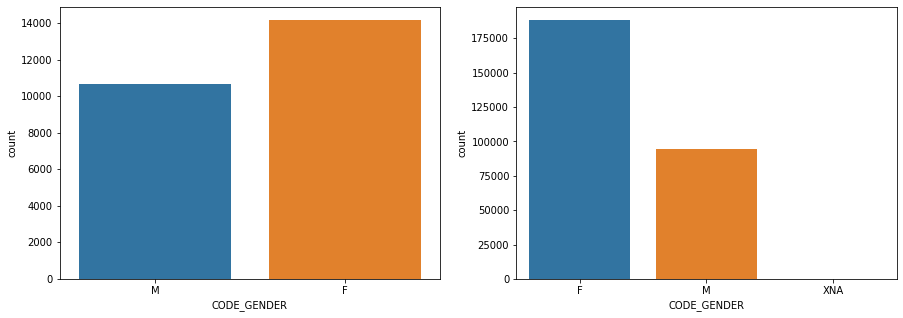

In [27]:
## Male Vs Female Defaulter/Non-Defaulter
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=defaulter['CODE_GENDER'], data=defaulter)
plt.subplot(1,2,2)
sns.countplot(x=non_defaulter['CODE_GENDER'],data=non_defaulter)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

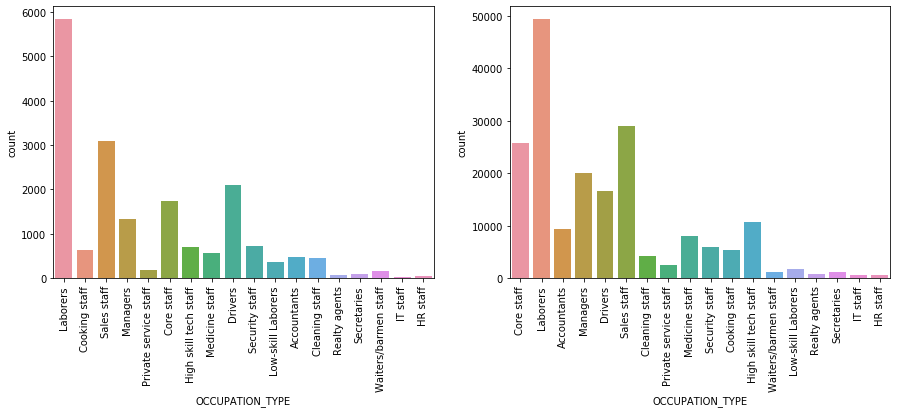

In [28]:
## Occupation types Defaulter/Non-Defaulter
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=defaulter['OCCUPATION_TYPE'],data=defaulter)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=non_defaulter['OCCUPATION_TYPE'],data=non_defaulter)
plt.xticks(rotation=90)

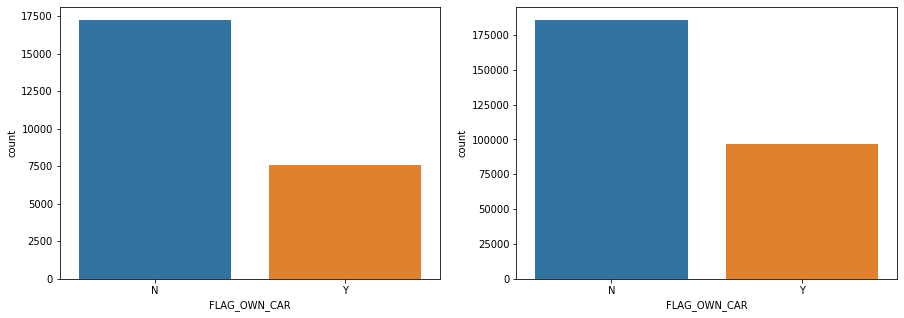

In [29]:
## Car Loan defaulters check
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=defaulter['FLAG_OWN_CAR'],data=defaulter)
plt.subplot(1,2,2)
sns.countplot(x=non_defaulter['FLAG_OWN_CAR'],data=non_defaulter)

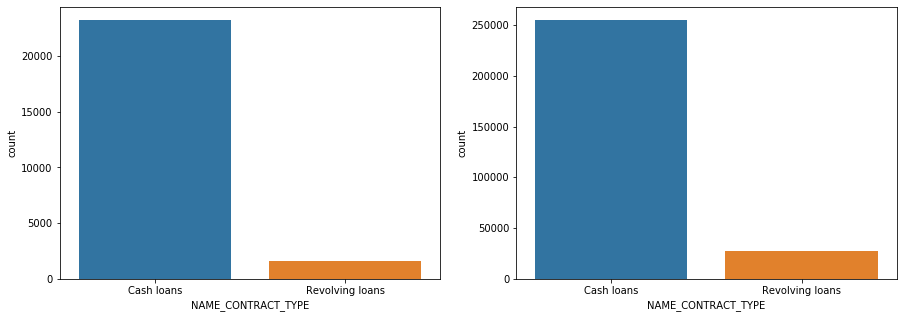

In [30]:
## Cash Loans and Receiving loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=defaulter['NAME_CONTRACT_TYPE'],data=defaulter)
plt.subplot(1,2,2)
sns.countplot(x=non_defaulter['NAME_CONTRACT_TYPE'],data=non_defaulter)

Correlation
For Target = 0 (Non-defaulter) dataset

In [31]:
## data from datatypes of int and float against Non-defaulters 
num = ['int64', 'float64']
non_defaulter1 = non_defaulter.select_dtypes(include = num)
non_defaulter1.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0
2,100004,0,0,81000.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-815.0,-2531,1,1.0,2,2,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-617.0,-2437,1,2.0,2,2,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-1106.0,-3458,1,1.0,2,2,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0,0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-2536.0,-477,1,2.0,2,2,0.354225,0.621226,0.0,0.0,0.0,1.0,1.0,0,0


In [32]:
#Select columns for correlation of Non-defaulters
non_defaulter1.drop(['SK_ID_CURR','TARGET','REGION_RATING_CLIENT_W_CITY','FLAG_MOBIL','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis = 1, inplace = True )
non_defaulter1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-828.0,-291,2.0,1,0,0
2,0,81000.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-815.0,-2531,1.0,2,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-617.0,-2437,2.0,2,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-1106.0,-3458,1.0,2,0,0
5,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-2536.0,-477,2.0,2,0,0


In [33]:
#converting negative values into positive ones
non_defaulter1['DAYS_BIRTH'] = non_defaulter1['DAYS_BIRTH'].abs()
non_defaulter1['DAYS_EMPLOYED'] = non_defaulter1['DAYS_EMPLOYED'].abs()
non_defaulter1['DAYS_REGISTRATION'] = non_defaulter1['DAYS_REGISTRATION'].abs()
non_defaulter1['DAYS_LAST_PHONE_CHANGE'] = non_defaulter1['DAYS_LAST_PHONE_CHANGE'].abs()

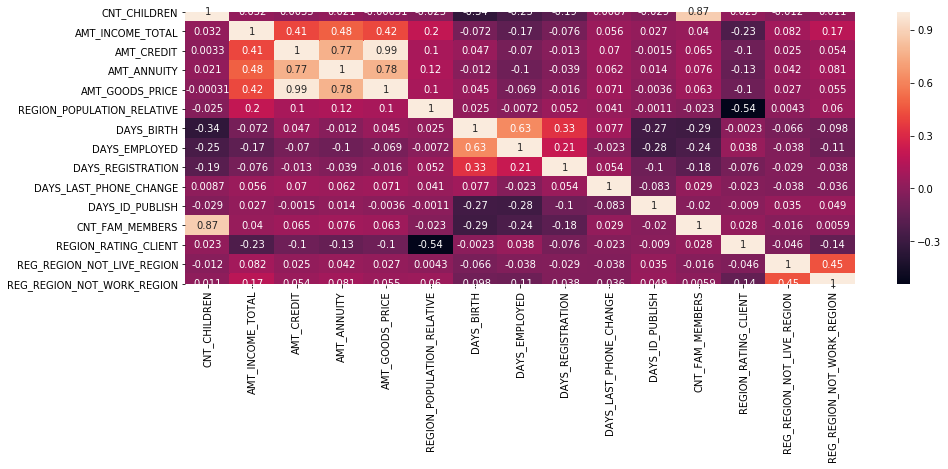

In [34]:
## Correlations matrix for all non-defaulters 
plt.figure(figsize=(15,5))
corr_matrix= non_defaulter1.corr()
sns.heatmap(corr_matrix, annot = True)

For target = 1 (Defaulter) dataset

In [35]:
defaulter1 = defaulter.select_dtypes(include = num)
defaulter1.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-1134.0,-2120,1,1.0,2,2,0.262949,0.139376,0.0,0.0,0.0,0.0,1.0,0,0
26,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573.0,-161.0,-1827,1,1.0,3,2,0.548477,0.190706,0.0,0.0,0.0,2.0,2.0,0,0
40,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,-1075.0,-1029,1,2.0,2,2,0.306841,0.320163,0.0,0.0,2.0,0.0,4.0,0,0
42,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,-45.0,-1480.0,-4409,1,2.0,3,3,0.674203,0.399676,0.0,0.0,0.0,0.0,2.0,0,0
81,100096,1,0,81000.0,252000.0,14593.5,252000.0,0.028663,-24794,365243,-5391.0,0.0,-4199,1,2.0,2,2,0.023952,0.720944,0.0,0.0,0.0,0.0,0.0,0,0


In [36]:
#Select columns for correlation
defaulter1 .drop(['SK_ID_CURR','TARGET','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis = 1, inplace = True )
defaulter1 .head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-1134.0,-2120,1.0,2,0,0
26,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573.0,-161.0,-1827,1.0,3,0,0
40,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,-1075.0,-1029,2.0,2,0,0
42,0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,-45.0,-1480.0,-4409,2.0,3,0,0
81,0,81000.0,252000.0,14593.5,252000.0,0.028663,-24794,365243,-5391.0,0.0,-4199,2.0,2,0,0


In [37]:
#changing negative values for positive ones
defaulter1['DAYS_BIRTH'] = defaulter1['DAYS_BIRTH'].abs()
defaulter1['DAYS_EMPLOYED'] = defaulter1['DAYS_EMPLOYED'].abs()
defaulter1['DAYS_REGISTRATION'] = defaulter1['DAYS_REGISTRATION'].abs()
defaulter1['DAYS_LAST_PHONE_CHANGE'] = defaulter1['DAYS_LAST_PHONE_CHANGE'].abs()

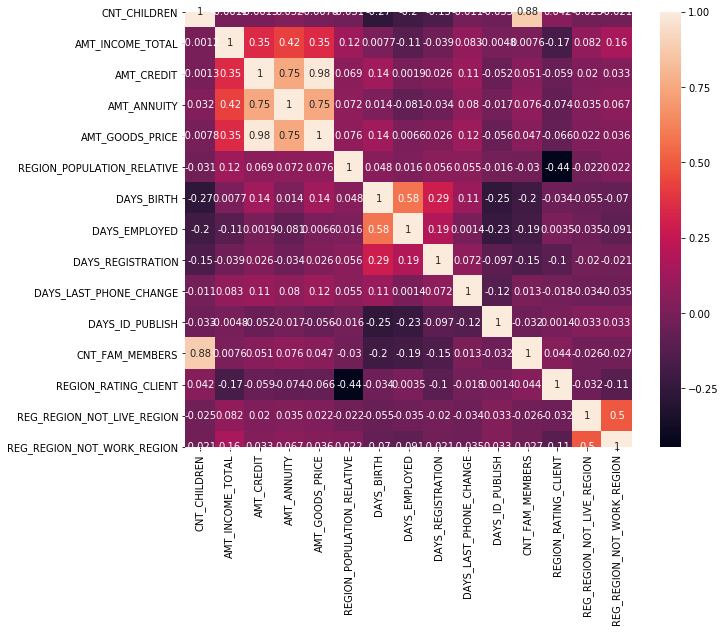

In [38]:
##Correlations Analysis for Defaulters
plt.figure(figsize=(10,8))
corr_matrix= defaulter1.corr()
sns.heatmap(corr_matrix, annot = True)

Univarite analysis on Continuous Columns

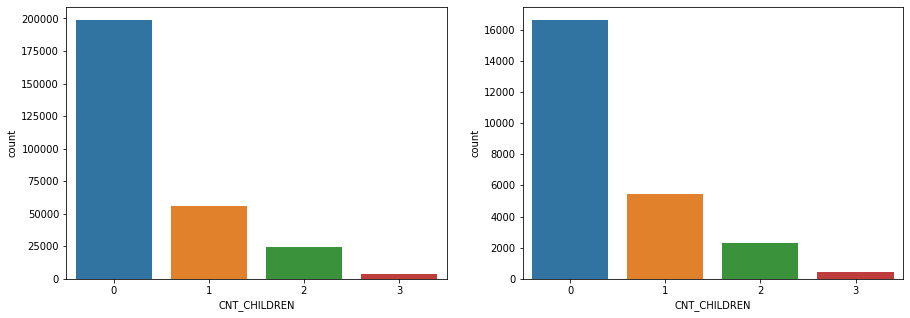

In [39]:
## Count of Children
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=non_defaulter['CNT_CHILDREN'],data=non_defaulter)
plt.subplot(1,2,2)
sns.countplot(x=defaulter['CNT_CHILDREN'],data=defaulter)

In [40]:
#calculating age of client defaulter
non_defaulter['client_age'] = round(non_defaulter.DAYS_BIRTH.abs()/365,0).astype(int)
defaulter['client_age'] = round(defaulter.DAYS_BIRTH.abs()/365,0).astype(int)

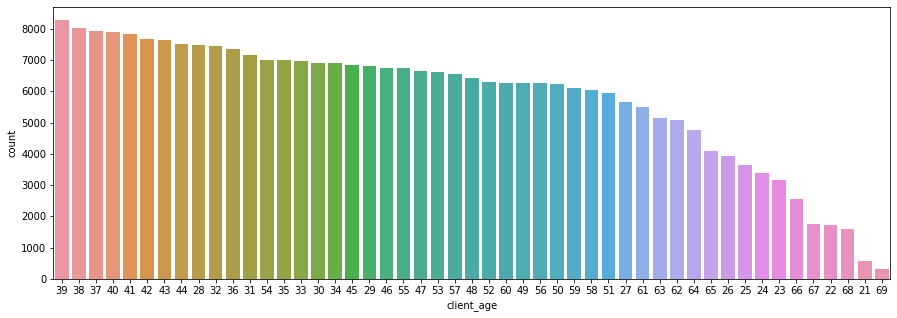

In [41]:
#pattern as per age of clients non defaulter
plt.figure(figsize=(15,5))
sns.countplot(x=non_defaulter['client_age'], data= non_defaulter, order =non_defaulter['client_age'].value_counts().index)

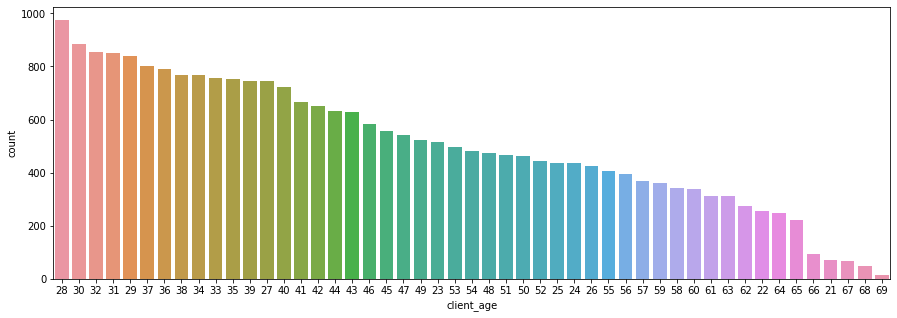

In [42]:
#pattern as per age of clients - defaulter
plt.figure(figsize=(15,5))
sns.countplot(x=defaulter['client_age'], data=defaulter, order = defaulter['client_age'].value_counts().index)

Bivariate Analysis of Numeric Columns

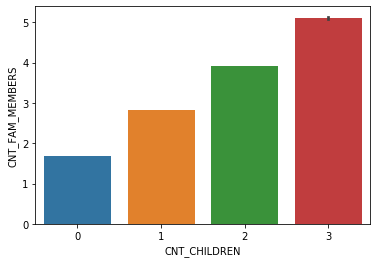

In [43]:
sns.barplot(x="CNT_CHILDREN", y="CNT_FAM_MEMBERS", data=non_defaulter)

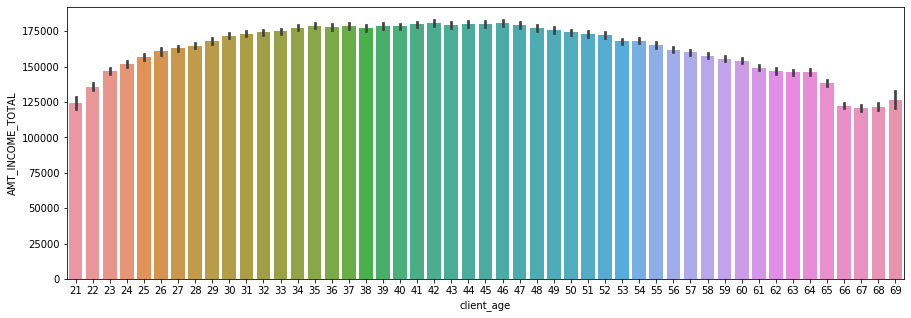

In [44]:
## Age of the applicant vs Amount of income
plt.figure(figsize=(15,5))
sns.barplot(x='client_age',y="AMT_INCOME_TOTAL", data=non_defaulter)

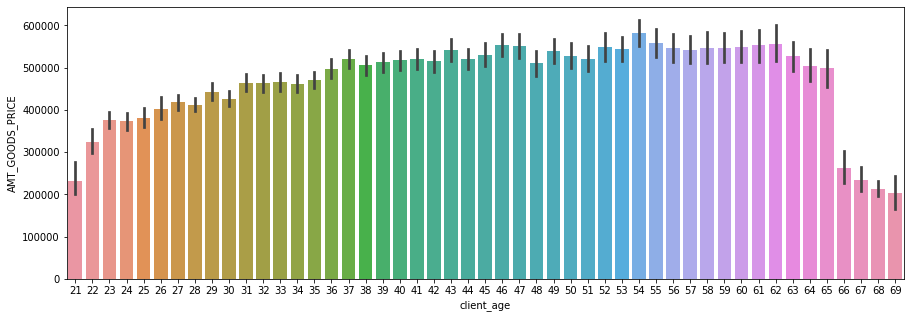

In [45]:
## Age of the applicant vs price of goods
plt.figure(figsize=(15,5))
sns.barplot(x='client_age',y="AMT_GOODS_PRICE", data=defaulter)

Reading 'Previous application' data file

In [46]:
## previous data
previous_data = pd.read_csv (r'C:\Users\Ravi.Edla.BENTLEY\Downloads\AnacondaFiles\AssignmentWorks\03_EDA_CaseStudy\Dataset\previous_application.csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
## combining data sets
Combined_DataSet = pd.merge(appl_curr_Data3, previous_data, on='SK_ID_CURR', how='inner')
Combined_DataSet.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-1134.0,-2120,1,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,1.0,0,0,Laborers,Small,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,81000.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-815.0,-2531,1,1.0,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0,0,Laborers,Small,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,

In [48]:
## Combined data set for loan status Approved
approoved_Loan=Combined_DataSet[Combined_DataSet.NAME_CONTRACT_STATUS=='Approved']
approoved_Loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-1134.0,-2120,1,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,1.0,0,0,Laborers,Small,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-828.0,-291,1,2.0,1,1,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,81000.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-815.0,-2531,1,1.0,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0,0,Laborers,Small,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [49]:
## Combined data set for loan status Cancelled 
cancelled_Loan = Combined_DataSet[Combined_DataSet.NAME_CONTRACT_STATUS=='Canceled']
cancelled_Loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-617.0,-2437,1,2.0,2,2,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Laborers,Small,2827850,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15,Y,1,NaN,NaN,NaN,XAP,Canceled,-181,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
10,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-617.0,-2437,1,2.0,2,2,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Laborers,Small,1243599,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-181,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
12,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-617.0,-2437,1,2.0,2,2,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Laborers,Small,2545789,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-181,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
21,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-2536.0,-477,1,2.0,2,2,Other,0.354225,0.621226,0.0,0.0,0.0,1.0,1.0,0,0,Laborers,Small,1757431,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,18,Y,1,NaN,NaN,NaN,XNA,Canceled,-82,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
40,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-1673.0,-3992,1,1.0,2,2,Electricity,0.746644,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Laborers,Small,2020951,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,13,Y,1,NaN,NaN,NaN,XNA,Canceled,-107,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
## Combined data set for loan status refused 
refused_Loan = Combined_DataSet[Combined_DataSet.NAME_CONTRACT_STATUS=='Refused']
refused_Loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
13,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-617.0,-2437,1,2.0,2,2,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Laborers,Small,1697039,Cash loans,32696.100,688500.0,906615.0,NaN,688500.0,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Refused,-181,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
33,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,0.0,-3514,1,2.0,2,2,XNA,0.205747,0.751724,0.0,0.0,0.0,0.0,1.0,0,0,NaN,Small,2668005,Cash loans,NaN,0.0,0.0,NaN,0.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Refused,-1162,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
79,100027,0,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-795.0,-3684,1,2.0,3,3,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,3.0,0,0,NaN,Small,2531618,Cash loans,22556.475,225000.0,239850.0,NaN,225000.0,SATURDAY,14,Y,1,NaN,NaN,NaN,XNA,Refused,-181,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),5,XNA,12.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
84,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,0.028663,-19334,-3494,-2419.0,0.0,-2893,1,2.0,2,2,Business Entity Type 3,0.651406,0.461482,0.0,0.0,0.0,0.0,0.0,0,0,Cleaning staff,Small,2691769,Consumer loans,3140.460,33660.0,33660.0,0.0,33660.0,SATURDAY,7,Y,1,0.0,NaN,NaN,XAP,Refused,-2688,XNA,SCO,Unaccompanied,Repeater,XNA,POS,XNA,Stone,30,Furniture,12.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
85,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,0.028663,-19334,-3494,-2419.0,0.0,-2893,1,2.0,2,2,Business Entity Type 3,0.651406,0.461482,0.0,0.0,0.0,0.0,0.0,0,0,Cleaning staff,Small,2579186,Consumer loans,3140.460,33660.0,33660.0,0.0,33660.0,FRIDAY,15,Y,1,0.0,NaN,NaN,XAP,Refused,-2689,XNA,SCO,Unaccompanied,Repeater,XNA,POS,XNA,Stone,30,Furniture,12.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
## Combined data set for loan status Unused Offer
Unused_offer = Combined_DataSet[Combined_DataSet.NAME_CONTRACT_STATUS=='Unused offer']
Unused_offer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,OCCUPATION_TYPE,family_size_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
222,100061,0,Cash loans,F,N,Y,2,225000.0,314055.0,16164.0,238500.0,Commercial associate,Higher education,Married,House / apartment,0.006629,-10473,-1392,-2025.0,-570.0,-1240,1,4.0,2,2,Self-employed,0.702979,0.701696,0.0,0.0,0.0,0.0,5.0,0,0,Core staff,Small,2474381,Consumer loans,NaN,66501.00,66501.00,NaN,66501.00,MONDAY,11,Y,1,NaN,NaN,NaN,XAP,Unused offer,-1067,XNA,CLIENT,"Spouse, partner",Repeater,Mobile,XNA,XNA,Stone,87,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
358,100086,0,Cash loans,F,N,Y,1,135000.0,675000.0,21775.5,675000.0,Commercial associate,Higher education,Widow,House / apartment,0.019101,-14264,-2492,-4327.0,-1597.0,-4517,1,2.0,2,2,Self-employed,0.569873,0.198620,0.0,0.0,1.0,4.0,2.0,0,0,Laborers,Small,2235967,Consumer loans,NaN,76072.95,76072.95,0.0,76072.95,SATURDAY,12,Y,1,0.0,NaN,NaN,XAP,Unused offer,-572,Cash through the bank,CLIENT,NaN,Repeater,Photo / Cinema Equipment,XNA,XNA,Country-wide,37,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
383,100093,0,Cash loans,F,N,Y,1,94500.0,585000.0,28273.5,585000.0,Working,Secondary / secondary special,Married,House / apartment,0.028663,-18253,-721,-1701.0,0.0,-1779,1,3.0,2,2,Postal,0.488600,NaN,0.0,0.0,0.0,0.0,3.0,0,0,Core staff,Small,1958389,Consumer loans,NaN,31171.50,31171.50,0.0,31171.50,FRIDAY,10,Y,1,0.0,NaN,NaN,XAP,Unused offer,-2034,Cash through the bank,CLIENT,Family,Repeater,Mobile,XNA,XNA,Country-wide,50,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
463,100116,0,Cash loans,F,N,Y,0,243000.0,900000.0,32017.5,900000.0,Working,Higher education,Married,House / apartment,0.010006,-14751,-6737,-3390.0,-1083.0,-4788,1,2.0,2,1,Kindergarten,0.700274,0.071055,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,1791436,Consumer loans,NaN,107210.25,107210.25,0.0,107210.25,SATURDAY,13,Y,1,0.0,NaN,NaN,XAP,Unused offer,-1083,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,50,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
465,100116,0,Cash loans,F,N,Y,0,243000.0,900000.0,32017.5,900000.0,Working,Higher education,Married,House / apartment,0.010006,-14751,-6737,-3390.0,-1083.0,-4788,1,2.0,2,1,Kindergarten,0.700274,0.071055,0.0,0.0,0.0,0.0,0.0,0,0,Core staff,Small,1524770,Consumer loans,NaN,72805.50,72805.50,0.0,72805.50,SATURDAY,13,Y,1,0.0,NaN,NaN,XAP,Unused offer,-614,Cash through the bank,CLIENT,NaN,Repeater,Photo / Cinema Equipment,XNA,XNA,Country-wide,48,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

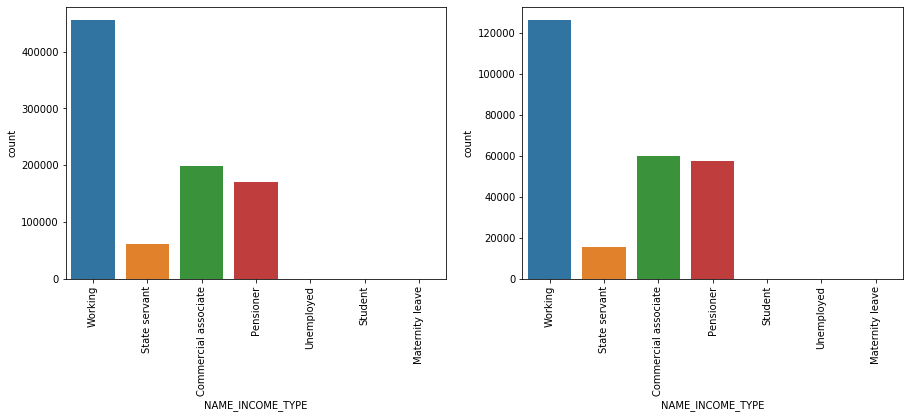

In [52]:
## Loan status for various Income types approved and cancelled loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=approoved_Loan['NAME_INCOME_TYPE'],data=approoved_Loan)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=cancelled_Loan['NAME_INCOME_TYPE'],data=cancelled_Loan)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

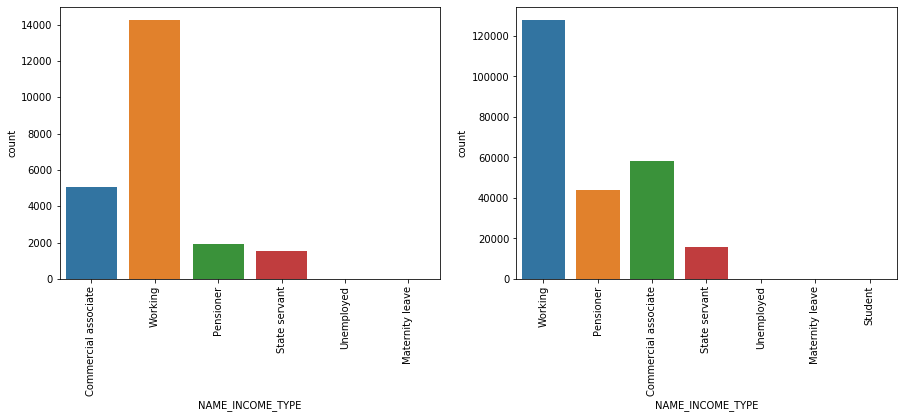

In [53]:
## Loan status for various Income types Unused_offer and refused loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=Unused_offer['NAME_INCOME_TYPE'],data=Unused_offer)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=refused_Loan['NAME_INCOME_TYPE'],data=refused_Loan)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

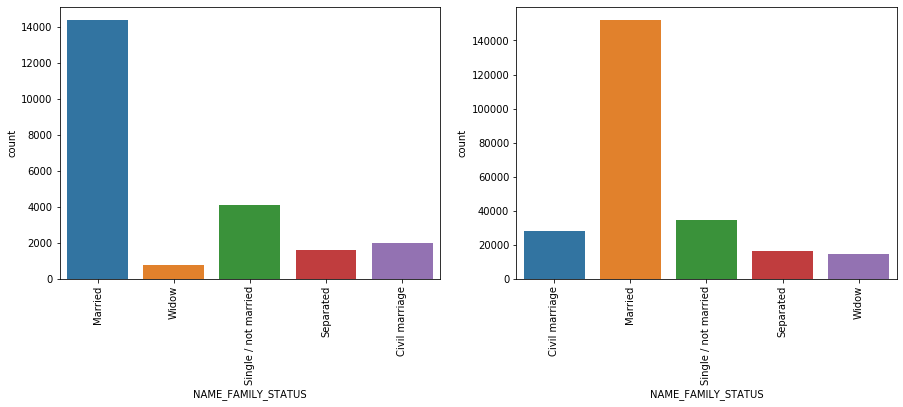

In [54]:
## Loan status based on Family status for Unused_offer and refused loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=Unused_offer['NAME_FAMILY_STATUS'],data=Unused_offer)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=refused_Loan['NAME_FAMILY_STATUS'],data=refused_Loan)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

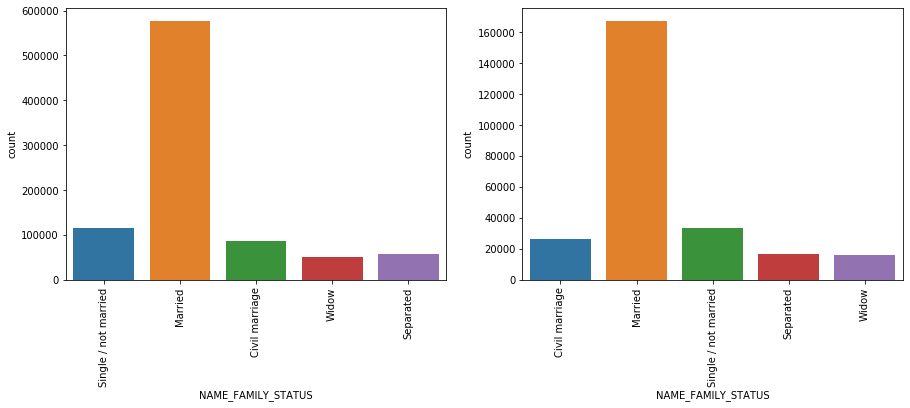

In [55]:
## Loan status based on Family status for approved and cancelled loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=approoved_Loan['NAME_FAMILY_STATUS'],data=approoved_Loan)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=cancelled_Loan['NAME_FAMILY_STATUS'],data=cancelled_Loan)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

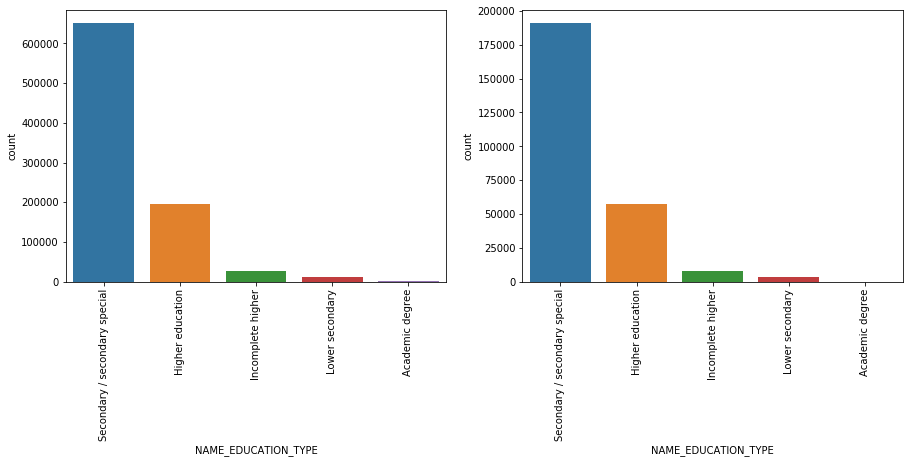

In [56]:
## Loan status based on Education type for approved and cancelled loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=approoved_Loan['NAME_EDUCATION_TYPE'],data=approoved_Loan)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=cancelled_Loan['NAME_EDUCATION_TYPE'],data=cancelled_Loan)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

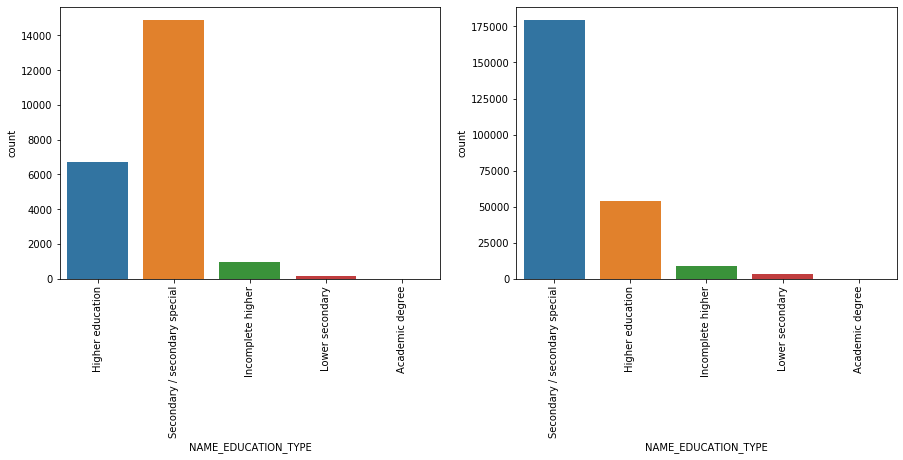

In [57]:
## Loan status based on Education type for Unused and refused loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=Unused_offer['NAME_EDUCATION_TYPE'],data=Unused_offer)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=refused_Loan['NAME_EDUCATION_TYPE'],data=refused_Loan)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

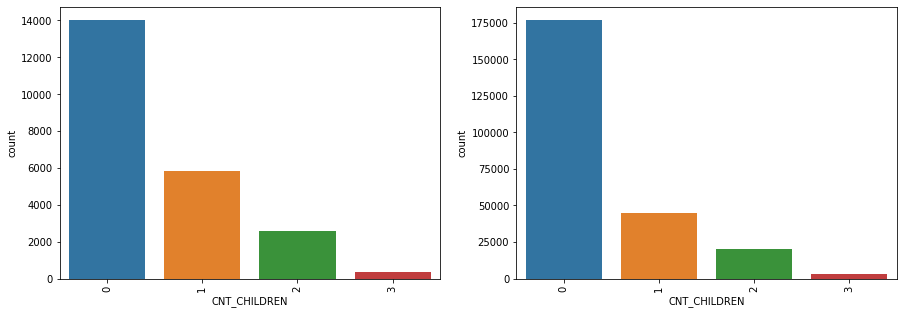

In [58]:
## Loan status based on Education type for Unused_offer and refused loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=Unused_offer['CNT_CHILDREN'],data=Unused_offer)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=refused_Loan['CNT_CHILDREN'],data=refused_Loan)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

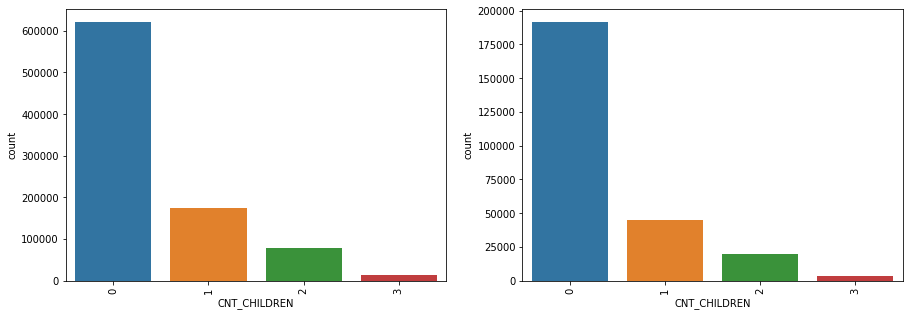

In [59]:
## Loan status based on Education type for approved and cancelled loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=approoved_Loan['CNT_CHILDREN'],data=approoved_Loan)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=cancelled_Loan['CNT_CHILDREN'],data=cancelled_Loan)
plt.xticks(rotation=90)